In [38]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from preprocessing_functions import preprocess_data


In [40]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
breast_cancer_new_df = pd.read_csv('breast_cancer_data_new.csv')
#preprocessing new data with our function preprocess_data
processed_data = preprocess_data(breast_cancer_new_df)
# Review the DataFrame
breast_cancer_new_df.head(10)

Null Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Column Names:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1
1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.15500,0.50460,0.68720,0.21350,0.4245,0.10500,0
2,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.19130,0.1956,0.06121,...,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815,0
3,15.080,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.06553,0.1647,0.06464,...,33.22,121.20,1050.0,0.16600,0.23560,0.40290,0.15260,0.2654,0.09438,0
4,11.140,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.01471,0.1690,0.06083,...,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018,1
5,12.560,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188,1
6,13.050,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317,1
7,13.870,16.21,88.52,593.7,0.08743,0.05492,0.015020,0.02088,0.1424,0.05883,...,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113,1
8,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.02381,0.1930,0.06621,...,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,1
9,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1


In [41]:
import joblib

# Load the saved SVM model
loaded_model = joblib.load('best_svm_model.pkl')

c:\Users\hp\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [42]:
# create the y and x(features) variables
true_labels = breast_cancer_new_df['target'].values
X = breast_cancer_new_df.drop(columns='target').values



In [43]:
#creating the scaler variable
scaler = StandardScaler()

#fitting the data into the scaler
X_scaler = scaler.fit(X)

# Scaling data
X_scaled = X_scaler.transform(X)

In [45]:
# Make predictions on the new dataset
predictions = loaded_model.predict(X_scaled)

# Evaluate accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy on new dataset:", accuracy)

Accuracy on new dataset: 0.9041095890410958


Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        54
           1       1.00      0.87      0.93       165

    accuracy                           0.90       219
   macro avg       0.86      0.94      0.88       219
weighted avg       0.93      0.90      0.91       219



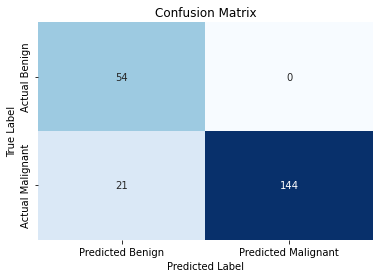

In [46]:
# Display classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()